# 비지도 학습
예를 들어, 사진을 분류한다고 해보자  
AI는 생선의 종류를 분류할 수는 있지만 과일의 종류를 분류할 수는 없다.  
이 경우를 타깃이 없다고 할 수 있는데, 이때 필요한 것이 바로 비지도 학습이다.  
</br>
여기서 흥미로운 제안을 하나 해보자  
* 사진의 픽셀값을 모두 평균내면 비슷한 과일끼리 모이지 않을까?
</br>
</br>

이번에는 사과, 바나나, 파인애플을 담고 있는 흑백 사진을 데이터로 활용한다.  






In [6]:
# !로 시작하면 코랩에세는 리눅스 셀 명령으로 이해한다.
# wget 명령은 원격 주소에서 데이터를 다운로드하여 저장한다.
# -o 옵션에서 저장할 파일 이름을 지정할 수 있다.
# 명령 실행 이후, 코랩 왼쪽 파일 탭을 열면 fruits_300.npy가 저장된 것을 볼 수 있다.
!wget https://bit.ly/fruits_300_data -o fruits_300.npy

In [7]:
# 데이터 로드
import numpy as np
import matplotlib.pyplot as plt  

In [15]:
# 넘파이에서 npy파일을 로드
# 책과는 조금 다르게 불러옴
fruits = np.load('fruits_300_data')

In [16]:
# fruits 배열 확인
print(fruits.shape)

(300, 100, 100)


300은 샘플의 수, 100은 이미지 높이, 100은 이미지 너비다.

In [17]:
# 첫 번째 이미지의 첫 번째 행을 출력, 3차원 배열이기 때문에
# 처음 2개의 인덱스를 0으로 지정, 마지막은 지정하지 않거나 :으로 처리
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


이 넘파이 배열은 흑백사진이므로 0~255까지의 정숫값을 가진다.

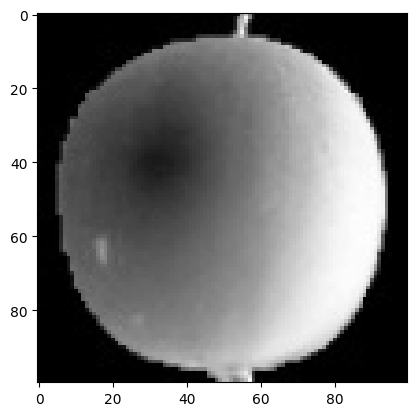

In [18]:
# imshow() 함수를 사용하여 이미지 그리기
plt.imshow(fruits[0], cmap= 'gray')

사?과?

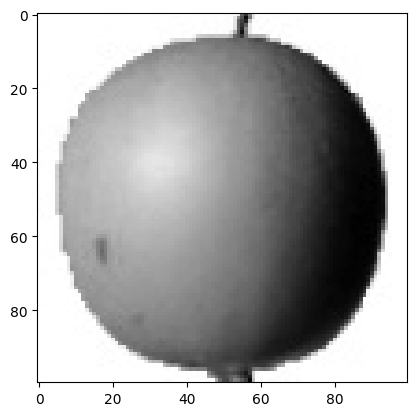

In [19]:
# 이미지 반전
# 밝은 부분이 0, 어두운 부분이 255에 가까움
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

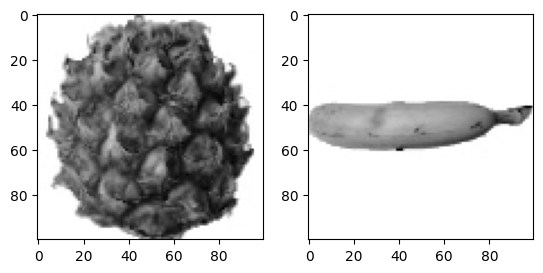

In [21]:
# 다른 이미지도 출력해보기
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap= 'gray_r')
axs[1].imshow(fruits[200], cmap= 'gray_r')
plt.show()

# 픽셀값 분석하기
100 X 100 크기의 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들자  
이렇게 하면 이미지 출력은 어렵지만 배열 계산에 편리하다.  


In [22]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [23]:
# 배열크기 확인
print(apple.shape)

(100, 10000)


In [24]:
# axis = 0은 첫 번째 축인 행을 따라가고 1이면 두 번째 축인 열을 따라간다.
# apple 배열의 mean() 메서드로 각 샘플의 픽셀 평균값을 계산
print(apple.mean(axis = 1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


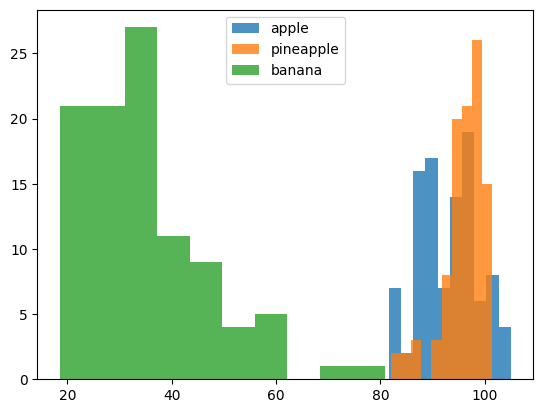

In [29]:
# 맷플롯립의 hist() 함수를 사용해 히스토그램을 그려보기
plt.hist(np.mean(apple, axis = 1), alpha=0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha=0.8)
plt.hist(np.mean(banana, axis = 1), alpha=0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

바나나의 평균값은 40 아래에 집중되어 있으며  
사과와 파인애플은 90~100 사이에 많이 모여 있다.  
바나나는 그렇다 쳐도, 사과와 파인애플 구분은 쉽지 않다.  
이번엔 샘플의 평균 값이 아닌, 픽셀별 평균 값을 비교해보자  

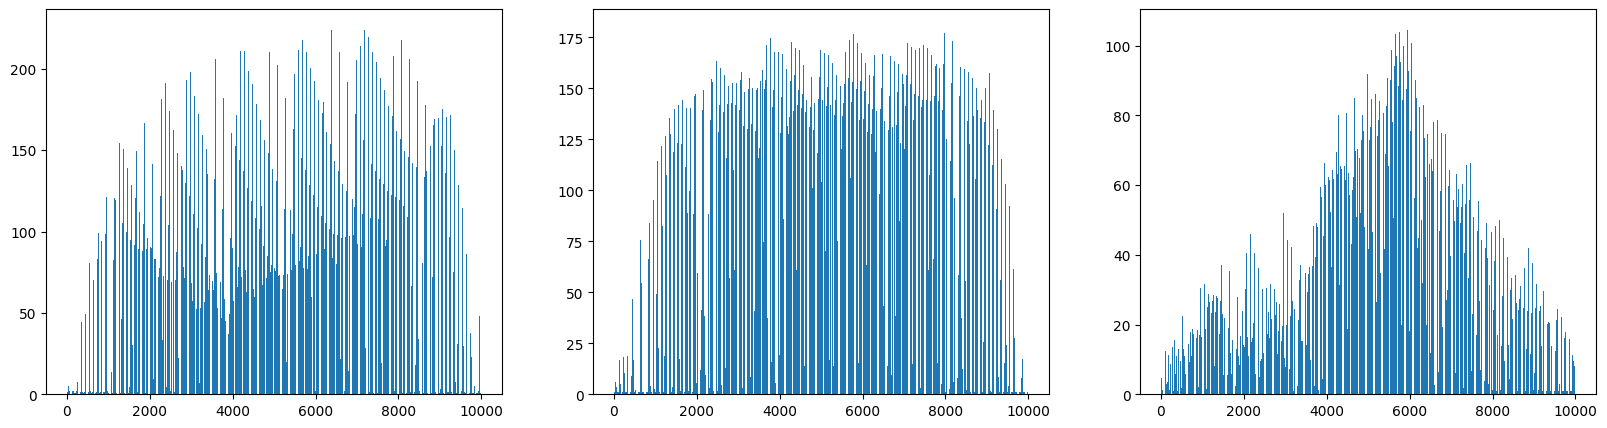

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

순서대로 사과, 파인애플, 바나나의 그래프다.  

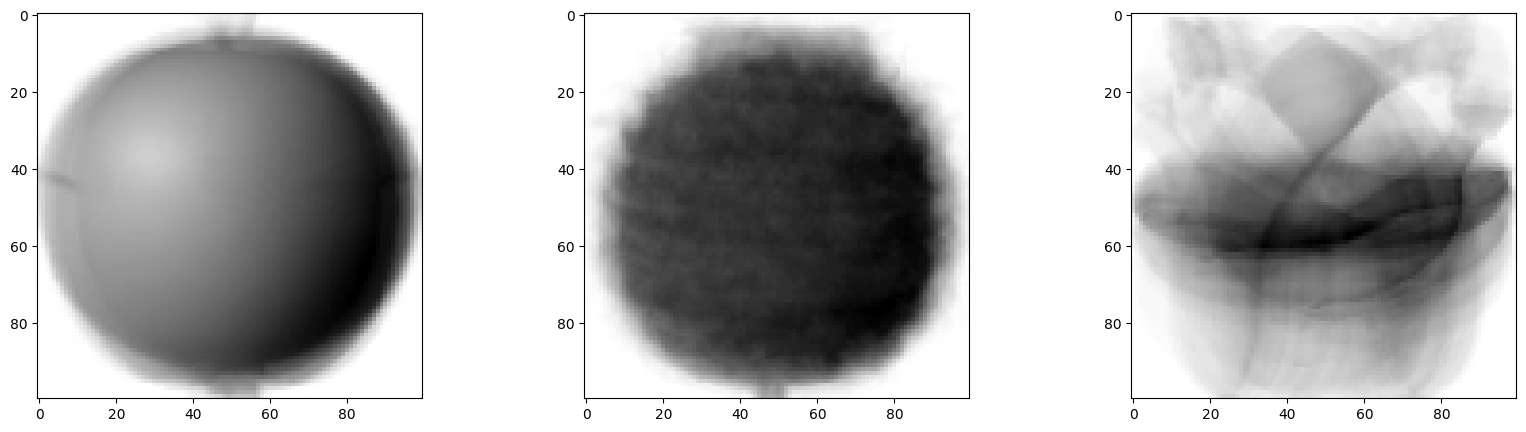

In [32]:
# 픽셀 평균 값을 100 X 100 크기로 바꿔서 이미지처럼 출력해보자
# 픽셀을 평균 낸 이미지를 모든 사진을 합쳐놓은 대표 이미지로 생각해보자
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')   # bar 대신 imshow
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()



세 과일은 픽셀 위치에 따라 값의 크기가 차이난다.  
따라서 이 대표 이미지와 가까운 사진을 골라낸다면  
아마도 각 과일을 구분할 수 있지 않을까?  

# 평균값과 가까운 사진 고르기

In [33]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


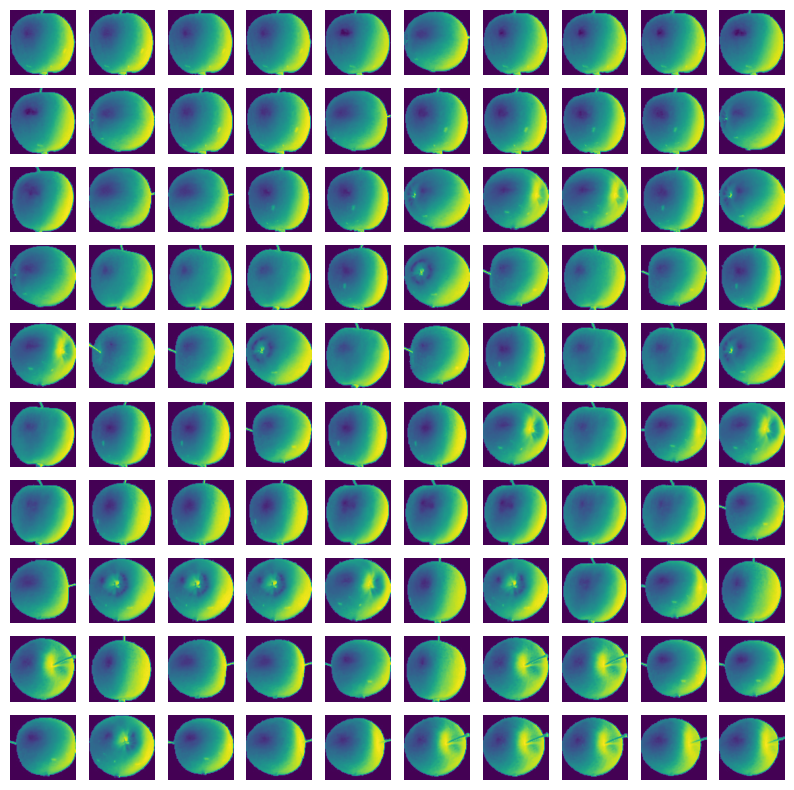

In [35]:
# abs 값이 가장 작은 100개의 사진을 뽑기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]])
    axs[i, j].axis('off')
plt.show()
# 전부 사과가 나온다.

# 정리
## ■ 비지도 학습
비지도 학습은 머신러닝의 한 종류로 훈련 데이터에 타깃이 없다.  
타깃이 없기 때문에 외부 도움 없이 스스로 유용한 무언가를 학습해야 한다.  
대표적인 비지도 학습 작업은 군집, 차원 축소 등이 있다.
## ■ 히스토그램
히스토그램은 구간별로 값이 발생한 빈도를 그래프로 표시한 것이다.  
보통 x 축이 값의 구간이고 y축은 발생 빈도이다.
## ■ 군집
비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업이다.  
